In [ ]:
!wget https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv

--2023-12-06 10:34:00--  https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv
Resolving data.giss.nasa.gov (data.giss.nasa.gov)... 129.164.128.233, 2001:4d0:2310:230::233
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|129.164.128.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12602 (12K) [text/csv]
Saving to: ‘GLB.Ts+dSST.csv’

GLB.Ts+dSST.csv     100%[===================>]  12.31K  --.-KB/s    in 0s      

2023-12-06 10:34:00 (210 MB/s) - ‘GLB.Ts+dSST.csv’ saved [12602/12602]



In [ ]:
import pandas as pd

df = pd.read_csv("/content/GLB.Ts+dSST.csv", skiprows = 1)

In [ ]:
df_main = df[df.columns[:-6]]
df_seasonal = df.iloc[:,[0,-6,-5,-4,-3,-2,-1]]

df_seasonal

,Year,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-.17,***,***,-0.12,-0.16,-.20
1,1881,-.09,-.10,-.17,0.04,-0.08,-.19
2,1882,-.11,-.09,.07,-0.09,-0.16,-.18
3,1883,-.18,-.20,-.34,-0.16,-0.10,-.20
4,1884,-.29,-.27,-.11,-0.37,-0.32,-.29
...,...,...,...,...,...,...,...
139,2019,.97,.96,.93,1.01,0.93,.97
140,2020,1.01,1.04,1.17,1.10,0.89,.99
141,2021,.84,.84,.75,0.81,0.86,.95
142,2022,.89,.90,.88,0.91,0.93,.86


In [ ]:
df_seasonal

,Year,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-.17,***,***,-0.12,-0.16,-.20
1,1881,-.09,-.10,-.17,0.04,-0.08,-.19
2,1882,-.11,-.09,.07,-0.09,-0.16,-.18
3,1883,-.18,-.20,-.34,-0.16,-0.10,-.20
4,1884,-.29,-.27,-.11,-0.37,-0.32,-.29
...,...,...,...,...,...,...,...
139,2019,.97,.96,.93,1.01,0.93,.97
140,2020,1.01,1.04,1.17,1.10,0.89,.99
141,2021,.84,.84,.75,0.81,0.86,.95
142,2022,.89,.90,.88,0.91,0.93,.86


In [ ]:
# Melt the DataFrame to convert it to long format
df_melted = pd.melt(df_main, id_vars='Year', var_name='Month', value_name='Value')

# Combine 'Year' and 'Month' columns to create a 'year-month' column
df_melted['Year-Month'] = df_melted['Year'].astype(str) + '-' + df_melted['Month']

# Convert 'Year-Month' column to datetime
df_melted['Year-Month'] = pd.to_datetime(df_melted['Year-Month'], format='%Y-%b')

# Drop unnecessary columns
df_pivoted = df_melted[['Year-Month', 'Value']]

# Replace non-numeric values with NaN
copied_col = df_pivoted['Value'].copy()

# Use .loc for both operations to avoid SettingWithCopyWarning
df_pivoted = df_pivoted.drop('Value', axis=1)
df_pivoted.loc[:, 'Value'] = copied_col.apply(pd.to_numeric, errors='coerce')

# Sort the DataFrame by 'Year-Month'
df_pivoted = df_pivoted.sort_values('Year-Month')

# Display the pivoted DataFrame
df_pivoted

,Year-Month,Value
0,1880-01-01,-0.19
144,1880-02-01,-0.25
288,1880-03-01,-0.09
432,1880-04-01,-0.16
576,1880-05-01,-0.10
...,...,...
1151,2023-08-01,1.19
1295,2023-09-01,1.47
1439,2023-10-01,1.34
1583,2023-11-01,NaN


Seasonality of our data is monthly. So, we have a time series with a seasonality of 12.

In [ ]:
df_pivoted.describe()

,Value
count,1726.000000
mean,0.066211
std,0.389091
min,-0.800000
25%,-0.220000
50%,-0.030000
75%,0.290000
max,1.470000


In [ ]:
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1727
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year-Month  1728 non-null   datetime64[ns]
 1   Value       1726 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.5 KB


In [ ]:
# Remove the two nan values at the end of the time series

df_pivoted.dropna(inplace = True)

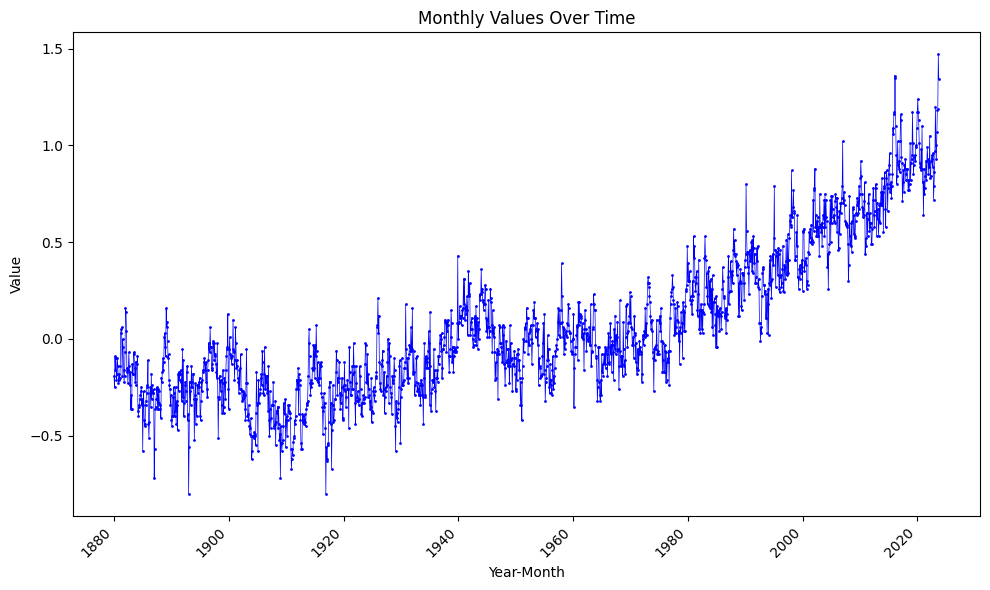

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_pivoted['Year-Month'], df_pivoted['Value'], marker='o', markersize = 1, linewidth = 0.5, color='b')
plt.title('Monthly Values Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()

The columns labelled ‘DJF’, ‘MAM’, ‘JJA’, and ‘SON’ contain seasonal averages (means). For example, the ‘MAM’ column contains the average of the March, April, and May columns for each year:

In [ ]:
df_seasonal

,Year,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-.17,***,***,-0.12,-0.16,-.20
1,1881,-.09,-.10,-.17,0.04,-0.08,-.19
2,1882,-.11,-.09,.07,-0.09,-0.16,-.18
3,1883,-.18,-.20,-.34,-0.16,-0.10,-.20
4,1884,-.29,-.27,-.11,-0.37,-0.32,-.29
...,...,...,...,...,...,...,...
139,2019,.97,.96,.93,1.01,0.93,.97
140,2020,1.01,1.04,1.17,1.10,0.89,.99
141,2021,.84,.84,.75,0.81,0.86,.95
142,2022,.89,.90,.88,0.91,0.93,.86


In [ ]:
# Plot a separate line chart for each season, using average temperature anomaly for that season on the vertical axis
# and time (from 1880 to the latest year available) on the horizontal axis.

## Create train, val and test splits



In [ ]:
len(df_pivoted)

1726

In [ ]:
split_1 = int(0.8*len(df_pivoted))
split_2 = int(0.9*len(df_pivoted))

X_train = df_pivoted[:split_1]["Year-Month"]
X_val = df_pivoted[split_1:split_2]["Year-Month"]
X_test = df_pivoted[split_2:]["Year-Month"]
y_train = df_pivoted[:split_1]["Value"]
y_val = df_pivoted[split_1:split_2]["Value"]
y_test = df_pivoted[split_2:]["Value"]

print(len(X_train))

1380


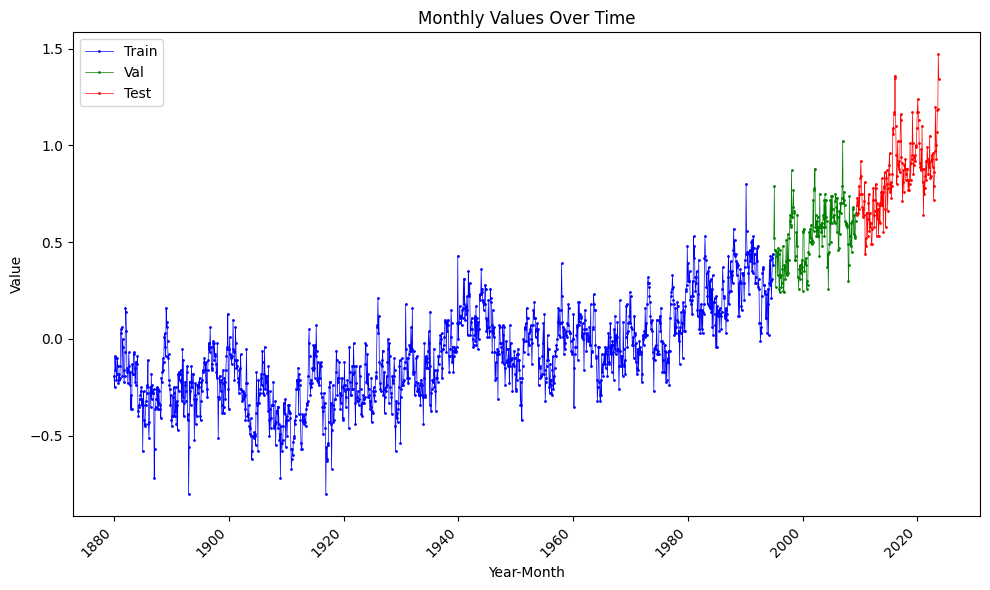

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, marker='o', markersize = 1, linewidth = 0.5, color='b', label = "Train")
plt.plot(X_val, y_val, marker='o', markersize = 1, linewidth = 0.5, color='g', label = "Val")
plt.plot(X_test, y_test, marker='o', markersize = 1, linewidth = 0.5, color='r', label = "Test")
plt.legend()
plt.title('Monthly Values Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()

## Build a Baseline model (Naive)

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View first 10 and last 10

(849     0.64
 993     0.73
 1137    0.69
 1281    0.71
 1425    0.65
 1569    0.79
 1713    0.67
 130     0.75
 274     0.83
 418     0.92
 Name: Value, dtype: float64,
 1726    0.79
 143     0.86
 287     0.97
 431     1.20
 575     1.00
 719     0.93
 863     1.07
 1007    1.18
 1151    1.19
 1295    1.47
 Name: Value, dtype: float64)

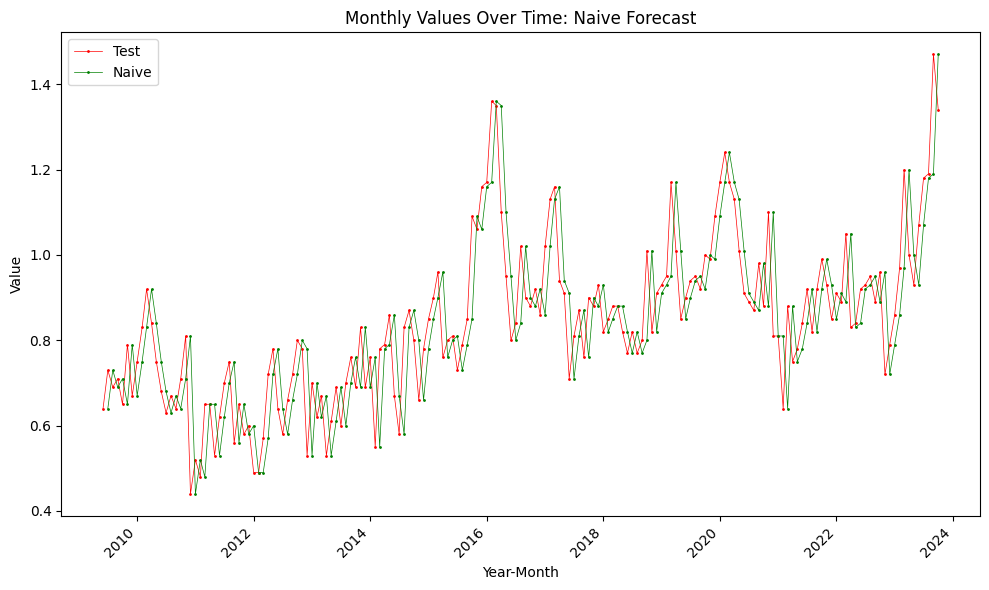

In [ ]:
# Plotting Naive forecast
offset = 100
plt.figure(figsize=(10, 6))
#plt.plot(X_train[1000:], y_train[1000:], marker='o', markersize = 1, linewidth = 0.5, color='b', label = "Train")
plt.plot(X_test, y_test, marker='o', markersize = 1, linewidth = 0.5, color='r', label = "Test")
plt.plot(X_test[1:], naive_forecast, marker='o', markersize = 1, linewidth = 0.5, color='g', label = "Naive")
plt.legend()
plt.title('Monthly Values Over Time: Naive Forecast')
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()

## Evaluation Metrics

In [ ]:
import tensorflow as tf
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy()}

In [ ]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 0.09523256, 'mse': 0.013891861, 'rmse': 0.11786374, 'mape': 11.97413}

Hmm... our MAPE for Naive is pretty poor as we can see visually and from the metric. It's because our temperature anomaly can fluctuate significantly enough that it is comparable to the absolute value.

In [ ]:
# Try using ARIMA as a baseline

## Moving Average Smoothing and series differencing

Remove trend and seasonality from the time series by subtracting the series at t-

In [ ]:
sma_forecast = y_test.rolling(12).mean()

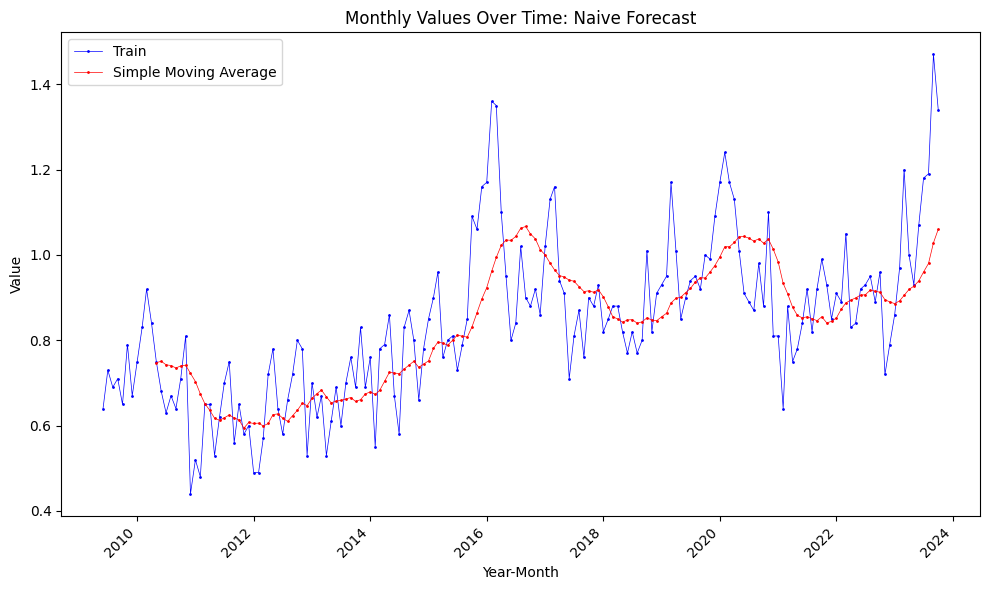

In [ ]:
# Plotting sma forecast
offset = 100
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, marker='o', markersize = 1, linewidth = 0.5, color='b', label = "Train")
plt.plot(X_test, sma_forecast, marker='o', markersize = 1, linewidth = 0.5, color='r', label = "Simple Moving Average")
#plt.plot(X_test[1:], naive_forecast, marker='o', markersize = 1, linewidth = 0.5, color='g', label = "Naive")
plt.legend()
plt.title('Monthly Values Over Time: Naive Forecast')
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()

In [ ]:
# create differenced series: series(t)- series(t-12) ie: subtract the value at t-12 from the value at t

def difference(dataset, interval=None):
 diff = list()
 lagged_series = list()
 for i in range(interval, len(dataset)):
  value = dataset[i] - dataset[i - interval]
  diff.append(value)
  lagged_series.append(dataset[i - interval])
 return pd.Series(diff), pd.Series(lagged_series)

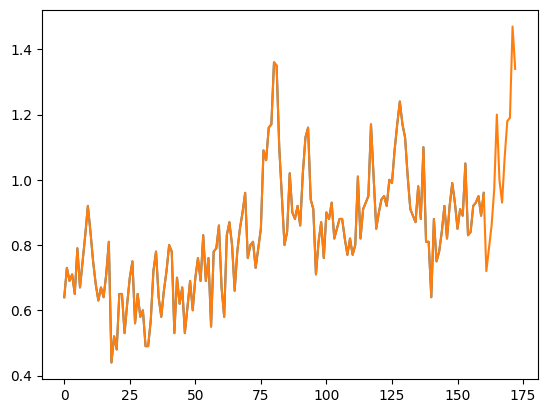

In [ ]:
# create differenced series: series(t)- series(t-12) ie: subtract the value at t-12 from the value at t
diffed_series, lagged_series = difference(y_test.values, interval = 12)
#plt.plot(diffed_series)
plt.plot(lagged_series)
plt.plot(pd.Series(y_test.values))
plt.show();

In [ ]:
# now calculate the moving average of the differenced time series. We can use centered window as our data is a difference (not in the past)

diff_sma = diffed_series.rolling(window = 24, center = True).mean()



In [ ]:
diff_sma

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
156   NaN
157   NaN
158   NaN
159   NaN
160   NaN
Length: 161, dtype: float64

In [ ]:
diffed_series

0      0.04
1     -0.10
2     -0.02
3     -0.07
4      0.06
       ... 
156    0.15
157    0.25
158    0.24
159    0.58
160    0.38
Length: 161, dtype: float64

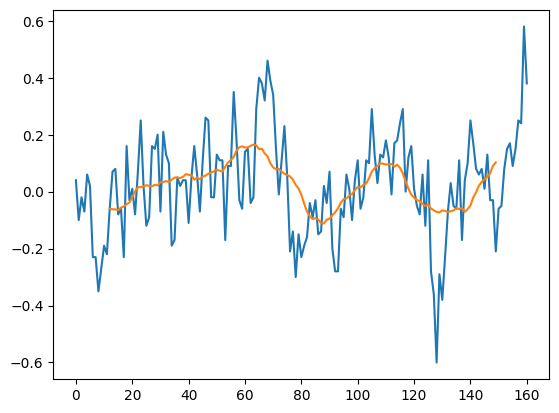

In [ ]:
# Plotting sma forecast
plt.plot(diffed_series)
plt.plot(diff_sma)
plt.show()

In [ ]:
# get our new forecast by adding the differenced time series sma and the series(t-365)

new_forecast = lagged_series + diff_sma
new_forecast

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
156   NaN
157   NaN
158   NaN
159   NaN
160   NaN
Length: 161, dtype: float64

In [ ]:
X_test[12:]

850    2010-06-01
994    2010-07-01
1138   2010-08-01
1282   2010-09-01
1426   2010-10-01
          ...    
863    2023-06-01
1007   2023-07-01
1151   2023-08-01
1295   2023-09-01
1439   2023-10-01
Name: Year-Month, Length: 161, dtype: datetime64[ns]

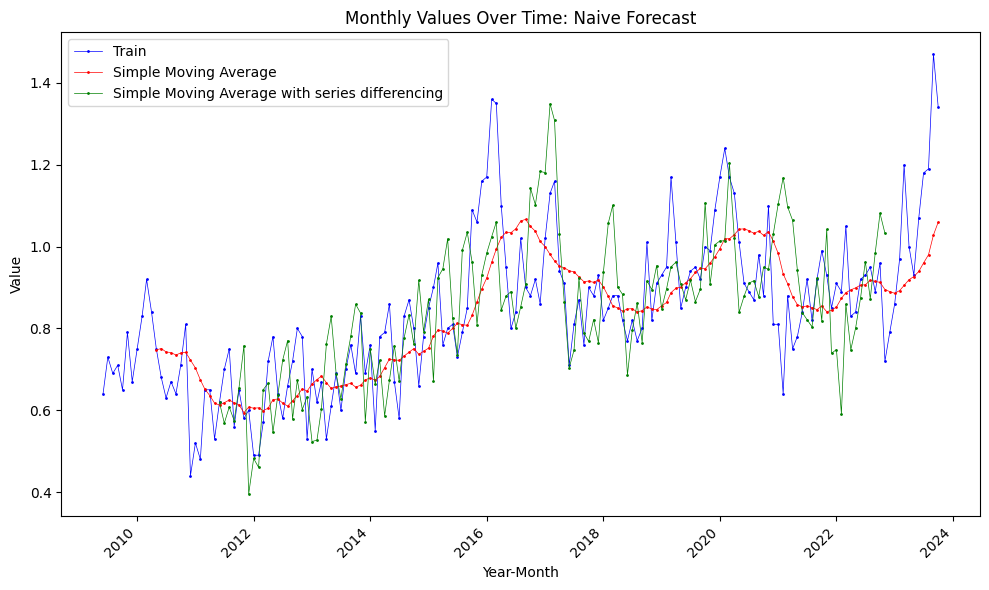

In [ ]:
# Plotting new forecast
offset = 100
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, marker='o', markersize = 1, linewidth = 0.5, color='b', label = "Test")
plt.plot(X_test, sma_forecast, marker='o', markersize = 1, linewidth = 0.5, color='r', label = "Simple Moving Average")
plt.plot(X_test[12:], new_forecast, marker='o', markersize = 1, linewidth = 0.5, color='g', label = "Simple Moving Average with series differencing")
#plt.plot(X_test[1:], naive_forecast, marker='o', markersize = 1, linewidth = 0.5, color='g', label = "Naive")
plt.legend()
plt.title('Monthly Values Over Time: Naive Forecast')
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()

In [ ]:
sma_results = evaluate_preds(y_test[11:], sma_forecast[11:])
sma_results

{'mae': 0.09805557, 'mse': 0.01643318, 'rmse': 0.12819196, 'mape': 11.61867}

In [ ]:
sma_with_differencing_results = evaluate_preds(y_test[24:-11], new_forecast[12:-11])
sma_with_differencing_results

{'mae': 0.11647344, 'mse': 0.022133617, 'rmse': 0.1487737, 'mape': 13.967834}

In [ ]:
new_forecast[12:-11]

12     0.619167
13     0.568333
14     0.607500
15     0.574583
16     0.654167
         ...   
145    0.963333
146    0.872500
147    0.984583
148    1.081250
149    1.032500
Length: 138, dtype: float64

In [ ]:
y_test[24:-11]

851     0.62
995     0.70
1139    0.75
1283    0.56
1427    0.65
        ... 
1006    0.93
1150    0.95
1294    0.89
1438    0.96
1582    0.72
Name: Value, Length: 138, dtype: float64

In [ ]:
naive_results

{'mae': 0.09523256, 'mse': 0.013891861, 'rmse': 0.11786374, 'mape': 11.97413}

## Windowing our dataset

### Method 1: function

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 6 # use 6 months worth of timesteps to predict the horizon

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_tensor = tf.range(8)+1
print(test_tensor)
test_window, test_label = get_labelled_windows(tf.expand_dims(test_tensor, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

tf.Tensor([1 2 3 4 5 6 7 8], shape=(8,), dtype=int32)
Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create function to view NumPy arrays as windows
import numpy as np
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(np.array(df_pivoted["Value"]), window_size = 6, horizon = 1)

# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [-0.19 -0.25 -0.09 -0.16 -0.1  -0.21] -> Label: [-0.18]
Window: [-0.25 -0.09 -0.16 -0.1  -0.21 -0.18] -> Label: [-0.1]
Window: [-0.09 -0.16 -0.1  -0.21 -0.18 -0.1 ] -> Label: [-0.14]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [0.97 1.2  1.   0.93 1.07 1.18] -> Label: [1.19]
Window: [1.2  1.   0.93 1.07 1.18 1.19] -> Label: [1.47]
Window: [1.   0.93 1.07 1.18 1.19 1.47] -> Label: [1.34]


### Method 2: timeseries_dataset_from_array built-in function

In [ ]:
# use in built timeseries_dataset_from_array
from tensorflow.keras.utils import timeseries_dataset_from_array


In [ ]:
temps = np.array(df_pivoted["Value"])
input_data = temps[:-6]
targets = temps[6:]

In [ ]:

dataset = timeseries_dataset_from_array(
    input_data,
    targets,
    sequence_length=6
)

In [ ]:
for batch in dataset:
  inputs, targets = batch
  assert np.array_equal(inputs[0], temps[:6])  # First sequence: steps [0-5]
  # Corresponding target: step 6
  assert np.array_equal(targets[0], temps[6])
  break

In [ ]:
inputs[:2], targets[:2]

(<tf.Tensor: shape=(2, 6), dtype=float64, numpy=
 array([[-0.19, -0.25, -0.09, -0.16, -0.1 , -0.21],
        [-0.25, -0.09, -0.16, -0.1 , -0.21, -0.18]])>,
 <tf.Tensor: shape=(2,), dtype=float64, numpy=array([-0.18, -0.1 ])>)

### Method 3: window_dataset udacity function

In [ ]:
def window_dataset(series, window_size, batch_size=32,
                   shuffle_buffer=1000):
    '''
    takes in a timeseries dataset and returns shuffled, windowed batches ready for model
       '''
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

### Model forecast predictions function

In [ ]:
import tensorflow as tf
import pandas as pd

def model_forecast(model, series = y_test):
  dataset = tf.data.Dataset.from_tensor_slices(y_test)
  dataset = dataset.window(6, shift = 1, drop_remainder = True) # to drop shorter windows at the end
  dataset = dataset.flat_map(lambda window: window.batch(6))
  dataset = dataset.batch(32).prefetch(1)
  preds = model.predict(dataset)
  return preds


## First model: Simple Linear Regression Model

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
window_size = 6
train_dataset = window_dataset(y_train, window_size)
val_dataset = window_dataset(y_val, window_size)

In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(1, input_shape = (window_size,))
    ])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10 **(epoch/30)
)

early_stop = tf.keras.callbacks.EarlyStopping(patience = 10)

optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-6, momentum = 0.9)


model.compile(loss = tf.keras.losses.Huber(),
              optimizer = optimizer,
              metrics = ["mae"])

history = model.fit(train_dataset, epochs = 200, validation_data = val_dataset, callbacks = [lr_schedule])

Epoch 1/200
43/43 [==============================] - 9s 17ms/step - loss: 0.0208 - mae: 0.1620 - val_loss: 0.0652 - val_mae: 0.3236 - lr: 1.0000e-06
Epoch 2/200
43/43 [==============================] - 0s 7ms/step - loss: 0.0208 - mae: 0.1620 - val_loss: 0.0652 - val_mae: 0.3236 - lr: 1.0798e-06
Epoch 3/200
43/43 [==============================] - 0s 5ms/step - loss: 0.0208 - mae: 0.1619 - val_loss: 0.0652 - val_mae: 0.3236 - lr: 1.1659e-06
Epoch 4/200
43/43 [==============================] - 0s 7ms/step - loss: 0.0208 - mae: 0.1619 - val_loss: 0.0652 - val_mae: 0.3235 - lr: 1.2589e-06
Epoch 5/200
43/43 [==============================] - 0s 5ms/step - loss: 0.0208 - mae: 0.1619 - val_loss: 0.0652 - val_mae: 0.3235 - lr: 1.3594e-06
Epoch 6/200
43/43 [==============================] - 0s 5ms/step - loss: 0.0208 - mae: 0.1619 - val_loss: 0.0652 - val_mae: 0.3235 - lr: 1.4678e-06
Epoch 7/200
43/43 [==============================] - 0s 6ms/step - loss: 0.0208 - mae: 0.1619 - val_loss: 0.065

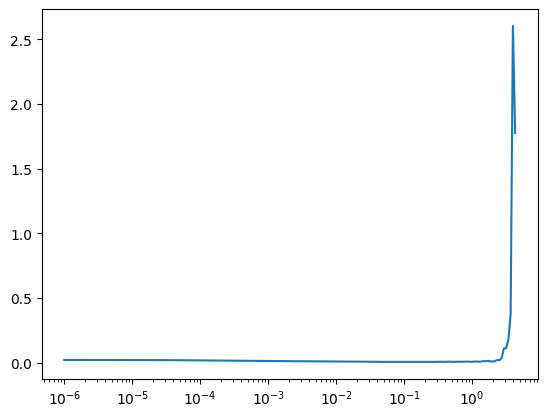

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"]);

we can see from the graph, where the loss stops decreasing but just before it stops becoming unstable, that a learning rate of 0.1 would be best.

In [ ]:
# same model as above, but with lr = 0.1 and using the early stopping callback

from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(1, input_shape = (window_size,))
    ])

early_stop = tf.keras.callbacks.EarlyStopping(patience = 10)

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1, momentum = 0.9)


model.compile(loss = tf.keras.losses.Huber(),
              optimizer = optimizer,
              metrics = ["mae"])

history = model.fit(train_dataset, epochs = 200, validation_data = val_dataset, callbacks = [early_stop])

Epoch 1/200
43/43 [==============================] - 1s 7ms/step - loss: 0.0113 - mae: 0.1181 - val_loss: 0.0135 - val_mae: 0.1347
Epoch 2/200
43/43 [==============================] - 0s 4ms/step - loss: 0.0078 - mae: 0.0985 - val_loss: 0.0078 - val_mae: 0.0991
Epoch 3/200
43/43 [==============================] - 0s 5ms/step - loss: 0.0067 - mae: 0.0909 - val_loss: 0.0072 - val_mae: 0.0943
Epoch 4/200
43/43 [==============================] - 0s 4ms/step - loss: 0.0064 - mae: 0.0878 - val_loss: 0.0063 - val_mae: 0.0872
Epoch 5/200
43/43 [==============================] - 0s 6ms/step - loss: 0.0062 - mae: 0.0855 - val_loss: 0.0074 - val_mae: 0.0948
Epoch 6/200
43/43 [==============================] - 0s 5ms/step - loss: 0.0061 - mae: 0.0850 - val_loss: 0.0071 - val_mae: 0.0924
Epoch 7/200
43/43 [==============================] - 0s 5ms/step - loss: 0.0060 - mae: 0.0850 - val_loss: 0.0061 - val_mae: 0.0860
Epoch 8/200
43/43 [==============================] - 0s 7ms/step - loss: 0.0061 - m

In [ ]:
model.evaluate(val_dataset)

6/6 [==============================] - 0s 4ms/step - loss: 0.0094 - mae: 0.1090


[0.009446866810321808, 0.1089508980512619]

In [ ]:
linear_reg_preds = model_forecast(model = model)


6/6 [==============================] - 0s 4ms/step


In [ ]:
linear_reg_results = evaluate_preds(y_test[5:], tf.squeeze(linear_reg_preds))

In [ ]:
linear_reg_results

{'mae': 0.12106724, 'mse': 0.017603602, 'rmse': 0.13267857, 'mape': 13.891913}

In [ ]:
naive_results

{'mae': 0.09523256, 'mse': 0.013891861, 'rmse': 0.11786374, 'mape': 11.97413}

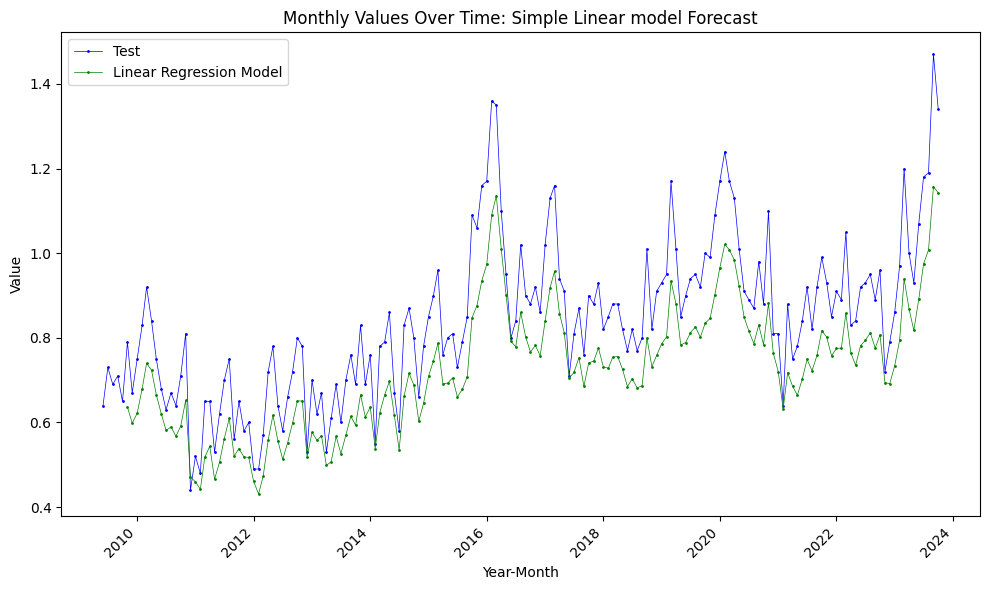

In [ ]:
# Plotting linear forecast
offset = 100
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, marker='o', markersize = 1, linewidth = 0.5, color='b', label = "Test")
#plt.plot(X_test, sma_forecast, marker='o', markersize = 1, linewidth = 0.5, color='r', label = "Simple Moving Average")
plt.plot(X_test[5:], linear_reg_preds, marker='o', markersize = 1, linewidth = 0.5, color='g', label = "Linear Regression Model")
#plt.plot(X_test[1:], naive_forecast, marker='o', markersize = 1, linewidth = 0.5, color='g', label = "Naive")
plt.legend()
plt.title('Monthly Values Over Time: Simple Linear model Forecast')
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()

## 2nd Model: RNN

In [ ]:
# build simple RNN Model

model_RNN = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), # this layer takes the input and expands the dimensions as rnns need 3-d input shape: (batch_size, window_size, output_dimensionality)
                  input_shape = [None]),
    layers.SimpleRNN(100, return_sequences = True),
    layers.SimpleRNN(100),
    layers.Dense(1),
    layers.Lambda(lambda x: x * 2.0)   # scale output as our time series have values ranging from -2 to 2, our tanh is between -1 and 1
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10 **(epoch/30)
)

optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-6, momentum = 0.9)

model_RNN.compile(loss = tf.keras.losses.Huber(),
              optimizer = optimizer,
              metrics = ["mae"])

history_rnn = model_RNN.fit(train_dataset, epochs = 200, validation_data = val_dataset, callbacks = [lr_schedule])

Epoch 1/200
43/43 [==============================] - 3s 23ms/step - loss: 0.0461 - mae: 0.2481 - val_loss: 0.2084 - val_mae: 0.6206 - lr: 1.0000e-06
Epoch 2/200
43/43 [==============================] - 1s 15ms/step - loss: 0.0427 - mae: 0.2378 - val_loss: 0.2018 - val_mae: 0.6102 - lr: 1.0798e-06
Epoch 3/200
43/43 [==============================] - 1s 14ms/step - loss: 0.0394 - mae: 0.2276 - val_loss: 0.1942 - val_mae: 0.5982 - lr: 1.1659e-06
Epoch 4/200
43/43 [==============================] - 1s 14ms/step - loss: 0.0364 - mae: 0.2181 - val_loss: 0.1857 - val_mae: 0.5843 - lr: 1.2589e-06
Epoch 5/200
43/43 [==============================] - 1s 30ms/step - loss: 0.0339 - mae: 0.2097 - val_loss: 0.1769 - val_mae: 0.5694 - lr: 1.3594e-06
Epoch 6/200
43/43 [==============================] - 1s 16ms/step - loss: 0.0315 - mae: 0.2016 - val_loss: 0.1674 - val_mae: 0.5527 - lr: 1.4678e-06
Epoch 7/200
43/43 [==============================] - 1s 16ms/step - loss: 0.0295 - mae: 0.1945 - val_loss:

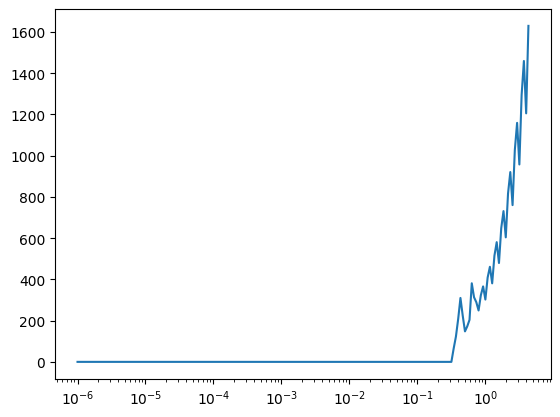

In [ ]:
plt.semilogx(history_rnn.history["lr"], history_rnn.history["loss"]);

In [ ]:
# build simple RNN Model with fixed lr: 0.1

model_RNN = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), # this layer takes the input and expands the dimensions as rnns need 3-d input shape: (batch_size, window_size, output_dimensionality)
                  input_shape = [None]),
    layers.SimpleRNN(100, return_sequences = True),
    layers.SimpleRNN(100),
    layers.Dense(1),
    layers.Lambda(lambda x: x * 2.0)   # scale output as our time series have values ranging from -2 to 2, our tanh is between -1 and 1
])

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = 'model_checkpoints/simple_RNN/simple_RNN.h5', save_best_only = True)

model_RNN.compile(loss = tf.keras.losses.Huber(),
              optimizer = optimizer,
              metrics = ["mae"])

history_rnn = model_RNN.fit(train_dataset, epochs = 150, validation_data = val_dataset, callbacks = [model_checkpoint_callback])

Epoch 1/150
43/43 [==============================] - 3s 23ms/step - loss: 0.0333 - mae: 0.1860 - val_loss: 0.0434 - val_mae: 0.2721
Epoch 2/150
 1/43 [..............................] - ETA: 3s - loss: 0.0078 - mae: 0.1055

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


43/43 [==============================] - 1s 17ms/step - loss: 0.0077 - mae: 0.0961 - val_loss: 0.0067 - val_mae: 0.0888
Epoch 3/150
43/43 [==============================] - 1s 16ms/step - loss: 0.0067 - mae: 0.0912 - val_loss: 0.0126 - val_mae: 0.1303
Epoch 4/150
43/43 [==============================] - 1s 15ms/step - loss: 0.0063 - mae: 0.0875 - val_loss: 0.0097 - val_mae: 0.1119
Epoch 5/150
43/43 [==============================] - 1s 17ms/step - loss: 0.0062 - mae: 0.0862 - val_loss: 0.0082 - val_mae: 0.1006
Epoch 6/150
43/43 [==============================] - 1s 28ms/step - loss: 0.0062 - mae: 0.0861 - val_loss: 0.0201 - val_mae: 0.1732
Epoch 7/150
43/43 [==============================] - 1s 28ms/step - loss: 0.0063 - mae: 0.0870 - val_loss: 0.0168 - val_mae: 0.1557
Epoch 8/150
43/43 [==============================] - 1s 16ms/step - loss: 0.0063 - mae: 0.0863 - val_loss: 0.0109 - val_mae: 0.1200
Epoch 9/150
43/43 [==============================] - 1s 14ms/step - loss: 0.0064 - mae: 

In [ ]:
loaded_rnn = tf.keras.models.load_model("/content/model_checkpoints/simple_RNN/simple_RNN.h5")

In [ ]:
model_RNN.evaluate(val_dataset)

6/6 [==============================] - 0s 10ms/step - loss: 0.0065 - mae: 0.0884


[0.006481182761490345, 0.0883927196264267]

In [ ]:
loaded_rnn.evaluate(val_dataset)

6/6 [==============================] - 1s 13ms/step - loss: 0.0059 - mae: 0.0858


[0.0058967843651771545, 0.08581739664077759]

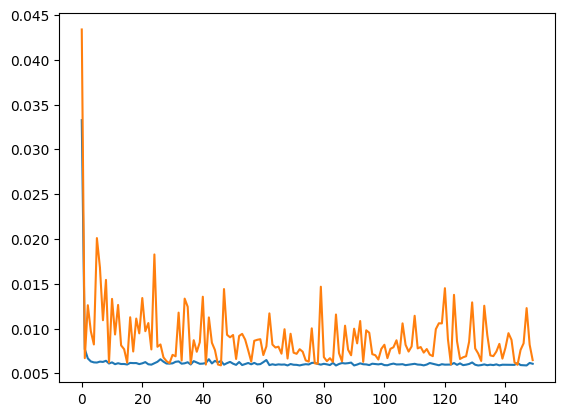

In [ ]:
plt.plot(pd.DataFrame(history_rnn.history["loss"]))
plt.plot(pd.DataFrame(history_rnn.history["val_loss"]));

In [ ]:
rnn_preds = model_forecast(model = loaded_rnn)


6/6 [==============================] - 0s 12ms/step


In [ ]:
rnn_results = evaluate_preds(y_test[5:], tf.squeeze(rnn_preds))

In [ ]:
rnn_results

{'mae': 0.08100737, 'mse': 0.010196419, 'rmse': 0.10097732, 'mape': 8.820723}

In [ ]:
naive_results

{'mae': 0.09523256, 'mse': 0.013891861, 'rmse': 0.11786374, 'mape': 11.97413}

In [ ]:
linear_reg_results

{'mae': 0.12106724, 'mse': 0.017603602, 'rmse': 0.13267857, 'mape': 13.891913}

From the above metrics it appears that our simple RNN does not perform that well compared to our baseline model... what if we tried a multi-RNN model which is seq-to-seq over seq-to-vec?

## Sequence-to-Sequence RNN Model

With a sequence to sequence RNN model, we have our features mapped one-to-one with our labels.

So , we do not need to reshape our data when we feed it into the model as we have a sequence of features predicting a sequence of labels. In our sequence-to-vector problem, we did have to expand the dimensionality so our input features in each window dataset would be the right dimensions for our single label.

e.g.: sequence-to-sequence, window size 3:
`[1, 2, 3] -> [4, 5, 6]`

e.g.: sequence-to-vector, window size 3:
`[1, 2, 3] -> [4]`

In the sequence-to-vector example, we need to expand_dims(axis = -1) so we have the correct dimensionality to map the values in our sequence to our single value:

`[[1], [2], [3]] -> [4]`

In [ ]:
def window_dataset_seq(series, window_size, batch_size=32,
                   shuffle_buffer=1000):
    '''
    takes in a timeseries dataset and returns shuffled, windowed batches ready for model
       '''
    series = tf.expand_dims(series, axis = -1)
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[1:]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [ ]:
train_dataset_seq = window_dataset_seq(y_train, 6)
val_dataset_seq = window_dataset_seq(y_val, 6)

In [ ]:
train_dataset_seq

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

In [ ]:
for i, j in train_dataset_seq.take(1):
  print(i.shape, j.shape)

(32, 6, 1) (32, 6, 1)


In [ ]:
# build seq-to-seq RNN Model

model_RNN_seq = tf.keras.Sequential([
    layers.SimpleRNN(100, return_sequences = True, input_shape = [6, 1]), # batch size dim is inferred for all keras layers. so give first dim = 6 (window size, if it was varying sequence length could put None) and second dim = 1 (we only have 1 feature for the time series- temp)
    layers.SimpleRNN(100, return_sequences = True),
    layers.Dense(1),
    layers.Lambda(lambda x: x * 2.0)   # scale output as our time series have values ranging from -2 to 2, our tanh is between -1 and 1
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10 **(epoch/30)
)

optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-6, momentum = 0.9)

model_RNN_seq.compile(loss = tf.keras.losses.Huber(),
              optimizer = optimizer,
              metrics = ["mae"])

history_rnn_seq = model_RNN_seq.fit(train_dataset_seq, epochs = 200, validation_data = val_dataset_seq, callbacks = [lr_schedule])

Epoch 1/200
43/43 [==============================] - 3s 24ms/step - loss: 0.0268 - mae: 0.1761 - val_loss: 0.1086 - val_mae: 0.3939 - lr: 1.0000e-06
Epoch 2/200
43/43 [==============================] - 1s 16ms/step - loss: 0.0265 - mae: 0.1752 - val_loss: 0.1082 - val_mae: 0.3932 - lr: 1.0798e-06
Epoch 3/200
43/43 [==============================] - 1s 15ms/step - loss: 0.0263 - mae: 0.1743 - val_loss: 0.1077 - val_mae: 0.3923 - lr: 1.1659e-06
Epoch 4/200
43/43 [==============================] - 1s 18ms/step - loss: 0.0260 - mae: 0.1733 - val_loss: 0.1073 - val_mae: 0.3914 - lr: 1.2589e-06
Epoch 5/200
43/43 [==============================] - 1s 15ms/step - loss: 0.0256 - mae: 0.1722 - val_loss: 0.1067 - val_mae: 0.3903 - lr: 1.3594e-06
Epoch 6/200
43/43 [==============================] - 1s 16ms/step - loss: 0.0253 - mae: 0.1712 - val_loss: 0.1062 - val_mae: 0.3892 - lr: 1.4678e-06
Epoch 7/200
43/43 [==============================] - 1s 15ms/step - loss: 0.0250 - mae: 0.1701 - val_loss:

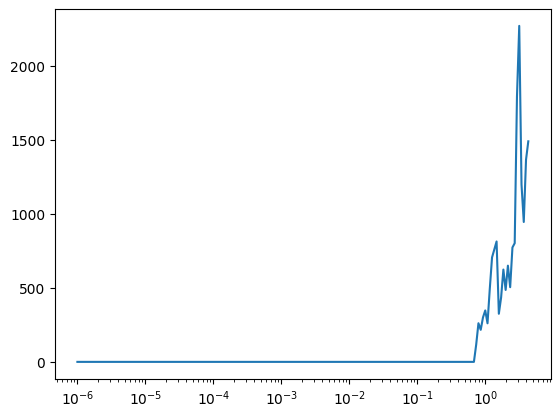

In [ ]:
plt.semilogx(history_rnn_seq.history["lr"], history_rnn_seq.history["loss"]);

In [ ]:
# build seq-to-seq RNN Model with fixed learning rate and model_checkpoint callback

model_RNN_seq = tf.keras.Sequential([
    layers.SimpleRNN(100, return_sequences = True, input_shape = [6, 1]), # batch size dim is inferred for all keras layers. so give first dim = 6 (window size, if it was varying sequence length could put None) and second dim = 1 (we only have 1 feature for the time series- temp)
    layers.SimpleRNN(100, return_sequences = True),
    layers.Dense(1),
    layers.Lambda(lambda x: x * 2.0)   # scale output as our time series have values ranging from -2 to 2, our tanh is between -1 and 1
])

optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-2, momentum = 0.9)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(save_best_only = True,
                                                      filepath = "model_checkpoints/seq_to_vec_rnn/model.h5")
model_RNN_seq.compile(loss = tf.keras.losses.Huber(),
              optimizer = optimizer,
              metrics = ["mae"])

history_rnn_seq = model_RNN_seq.fit(train_dataset_seq, epochs = 200, validation_data = val_dataset_seq, callbacks = [model_checkpoint])

Epoch 1/200
43/43 [==============================] - 4s 42ms/step - loss: 0.0125 - mae: 0.1196 - val_loss: 0.0116 - val_mae: 0.1185
Epoch 2/200
 1/43 [..............................] - ETA: 6s - loss: 0.0059 - mae: 0.0824

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


43/43 [==============================] - 1s 31ms/step - loss: 0.0065 - mae: 0.0877 - val_loss: 0.0096 - val_mae: 0.1089
Epoch 3/200
43/43 [==============================] - 1s 15ms/step - loss: 0.0065 - mae: 0.0874 - val_loss: 0.0111 - val_mae: 0.1188
Epoch 4/200
43/43 [==============================] - 1s 16ms/step - loss: 0.0064 - mae: 0.0868 - val_loss: 0.0111 - val_mae: 0.1191
Epoch 5/200
43/43 [==============================] - 1s 15ms/step - loss: 0.0064 - mae: 0.0868 - val_loss: 0.0099 - val_mae: 0.1107
Epoch 6/200
43/43 [==============================] - 1s 16ms/step - loss: 0.0064 - mae: 0.0871 - val_loss: 0.0105 - val_mae: 0.1151
Epoch 7/200
43/43 [==============================] - 1s 15ms/step - loss: 0.0065 - mae: 0.0875 - val_loss: 0.0119 - val_mae: 0.1240
Epoch 8/200
43/43 [==============================] - 1s 15ms/step - loss: 0.0064 - mae: 0.0871 - val_loss: 0.0109 - val_mae: 0.1167
Epoch 9/200
43/43 [==============================] - 1s 17ms/step - loss: 0.0064 - mae: 

In [ ]:
loaded_seq_rnn_model = tf.keras.models.load_model("/content/model_checkpoints/seq_to_vec_rnn/model.h5")

In [ ]:
loaded_seq_rnn_model.evaluate(val_dataset_seq)

6/6 [==============================] - 0s 10ms/step - loss: 0.0080 - mae: 0.0984


[0.008012299425899982, 0.0983988344669342]

In [ ]:
loaded_seq_rnn_model_preds = model_forecast(model = loaded_seq_rnn_model)
loaded_seq_rnn_model_preds

6/6 [==============================] - 0s 8ms/step


array([[[0.4866165 ],
        [0.69732976],
        [0.66281825],
        [0.62567806],
        [0.64623004],
        [0.7162699 ]],

       [[0.5524602 ],
        [0.68931615],
        [0.6559725 ],
        [0.60100055],
        [0.72213125],
        [0.69959646]],

       [[0.52332133],
        [0.69436   ],
        [0.6250088 ],
        [0.6699611 ],
        [0.69207263],
        [0.6745202 ]],

       ...,

       [[0.8767684 ],
        [1.0011979 ],
        [0.7608313 ],
        [0.85565263],
        [1.0221856 ],
        [0.99209577]],

       [[0.74317765],
        [0.9122702 ],
        [0.8814275 ],
        [0.9343269 ],
        [1.0171102 ],
        [1.1134418 ]],

       [[0.6948061 ],
        [0.9863773 ],
        [0.9885861 ],
        [0.9300737 ],
        [1.1210089 ],
        [1.157755  ]]], dtype=float32)

In [ ]:
loaded_seq_rnn_model_preds = loaded_seq_rnn_model_preds[:,-1,0] # take the last value in each output sequence for each time step

In [ ]:
y_test.shape

(173,)

In [ ]:
loaded_seq_rnn_model_results = evaluate_preds(y_test[5:], loaded_seq_rnn_model_preds)

In [ ]:
loaded_seq_rnn_model_results

{'mae': 0.078821644, 'mse': 0.00961817, 'rmse': 0.09807227, 'mape': 8.669515}

In [ ]:
naive_results

{'mae': 0.09523256, 'mse': 0.013891861, 'rmse': 0.11786374, 'mape': 11.97413}

In [ ]:
linear_reg_results

{'mae': 0.12106724, 'mse': 0.017603602, 'rmse': 0.13267857, 'mape': 13.891913}

In [ ]:
rnn_results

{'mae': 0.08100737, 'mse': 0.010196419, 'rmse': 0.10097732, 'mape': 8.820723}

### Improving our RNNs using 1D CNNs for processing

In [ ]:
# build simple RNN Model with fixed lr: 0.1, and with a pre-processing CNN layer
from tensorflow.keras import layers

model_RNN_conv1d = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), # this layer takes the input and expands the dimensions as rnns need 3-d input shape: (batch_size, window_size, output_dimensionality)
                  input_shape = [None]),
    layers.Conv1D(32, kernel_size = 2, padding = "causal"),
    layers.SimpleRNN(100, return_sequences = True),
    layers.SimpleRNN(100),
    layers.Dense(1),
    layers.Lambda(lambda x: x * 2.0)   # scale output as our time series have values ranging from -2 to 2, our tanh is between -1 and 1
])




In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = 'model_checkpoints/simple_RNN/simple_RNN_conv1d.h5', save_best_only = True)

model_RNN_conv1d.compile(loss = tf.keras.losses.Huber(),
              optimizer = optimizer,
              metrics = ["mae"])

history_rnn_conv1d = model_RNN_conv1d.fit(train_dataset, epochs = 150, validation_data = val_dataset, callbacks = [model_checkpoint_callback])

Epoch 1/150
43/43 [==============================] - 16s 32ms/step - loss: 0.0320 - mae: 0.1868 - val_loss: 0.0092 - val_mae: 0.1119
Epoch 2/150
 1/43 [..............................] - ETA: 3s - loss: 0.0116 - mae: 0.1232

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


43/43 [==============================] - 1s 21ms/step - loss: 0.0073 - mae: 0.0946 - val_loss: 0.0162 - val_mae: 0.1517
Epoch 3/150
43/43 [==============================] - 1s 20ms/step - loss: 0.0067 - mae: 0.0901 - val_loss: 0.0158 - val_mae: 0.1493
Epoch 4/150
43/43 [==============================] - 1s 19ms/step - loss: 0.0064 - mae: 0.0878 - val_loss: 0.0102 - val_mae: 0.1156
Epoch 5/150
43/43 [==============================] - 1s 21ms/step - loss: 0.0062 - mae: 0.0864 - val_loss: 0.0065 - val_mae: 0.0893
Epoch 6/150
43/43 [==============================] - 1s 21ms/step - loss: 0.0067 - mae: 0.0902 - val_loss: 0.0060 - val_mae: 0.0873
Epoch 7/150
43/43 [==============================] - 1s 29ms/step - loss: 0.0070 - mae: 0.0931 - val_loss: 0.0382 - val_mae: 0.2535
Epoch 8/150
43/43 [==============================] - 2s 32ms/step - loss: 0.0070 - mae: 0.0923 - val_loss: 0.0148 - val_mae: 0.1434
Epoch 9/150
43/43 [==============================] - 1s 20ms/step - loss: 0.0062 - mae: 

In [ ]:
model_RNN_conv1d.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, None, 1)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 32)          96        
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 100)         13300     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
 lambda_3 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33597 (131.24 KB)
Trainable params: 3359

In [ ]:
simple_RNN_conv1D_preds = model_forecast(model_RNN_conv1d)
simple_RNN_conv1D_preds.shape

6/6 [==============================] - 0s 11ms/step


(168, 1)

In [ ]:
simple_RNN_conv1D_results = evaluate_preds(y_test[5:], tf.squeeze(simple_RNN_conv1D_preds))

In [ ]:
simple_RNN_conv1D_results

{'mae': 0.120993786, 'mse': 0.020070652, 'rmse': 0.14167093, 'mape': 13.258145}